---
title: "Data Science Volunteering Part 1. Police Shooting in Texas"
date: "2021-05-24"
description: Jupyter Notebook on police shooting analysis in Texas from 2016 to 2019 (done in collaboration with Texas Justice Initiative)
image: "index.png"
format:
  html:
    code-fold: true
---

>I have met several tech workers who were interested in using their technical skills in more meaningful projects particularly for social good. As a tech worker myself, I’ve been volunteering at several organizations about two years now. Among those, I have been volunteering at Texas Justice Initiative (TJI). In this post, I’d like to share some of my volunteering at TJI, particularly on police shooting in Texas.

In [1]:
import pandas as pd
pd.set_option('precision', 2)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

from IPython.core.pylabtools import figsize
from IPython.display import display
figsize(8, 5)

# custom modules
sys.path.append('../src/')
import plot
import preprocess

%load_ext watermark
%load_ext autoreload
%autoreload 2
%matplotlib inline

%watermark -d -t -u -v -g -r -b -iv -a "Hongsup Shin"

Author: Hongsup Shin

Last updated: 2021-05-24 18:31:44

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 7.20.0

Git hash: d7b4e435d90633a7d179a01e136b02487d2c5f0b

Git repo: https://github.com/hongsups/blog.git

Git branch: TJI_volunteering

numpy     : 1.20.2
pandas    : 1.2.3
seaborn   : 0.11.1
matplotlib: 3.4.1
sys       : 3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 15:59:12) 
[Clang 11.0.1 ]



In [2]:


# styling setup
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 11

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12

plt.rcParams['figure.dpi'] = 72
plt.rcParams['figure.titlesize'] = 12

plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.edgecolor'] = 'white'

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

cols_race = ['#CE2827', '#3167AE', '#4C5151', '#B8BAB9']

As a tech worker, I've been volunteering at several organizations about two years now. Among those, I have been volunteering at [Texas Justice Initiative (TJI)](https://texasjusticeinitiative.org/) consistently over a year where I published [a data journalism report on police shooting in Texas](https://texasjusticeinitiative.org/static/TJI_OISReport_2020.pdf) with our TJI director, [Eva Ruth Moravec](https://www.linkedin.com/in/eva-ruth-moravec-m-a-1aa9332/). [Texas Justice Iniative (TJI)](https://texasjusticeinitiative.org/) is a criminal justice nonprofit in Austin, TX. It was founded in 2016 by Eva Ruth Moravec, a journalist, and Amanda Woog, a researcher. The main goal of TJI is to **create data portal for criminal justice in Texas**. TJI mostly relies on tech volunteers. We currently have [11 active volunteers](https://texasjusticeinitiative.org/about), including myself.

In this post, I'd like to share some of my volunteering at TJI, particularly on police shooting in Texas. In the follow-up post, I will share some tips on tech volunteering at nonprofits, especially focusing on how to use machine learning and data science knowledge.

## Police shooting in the US is a globally recognized public health issue

It's 2021 now and almost everyone in the US is aware that there is an epidemic of police brutality all over the country. Academic researchers now agree that [police contact is a significant contributing factor to health inequality and particuarly to early mortality for people of color](https://pubmed.ncbi.nlm.nih.gov/31383756/). The police brutality in the US is also internationally recognizied such as in [the 2014 report by the UN Committee Against Torture](https://www.justsecurity.org/wp-content/uploads/2014/11/UN-Committee-Against-Torture-Concluding-Observations-United-States.pdf):
> The   Committee   is   concerned   about   numerous   reports  of   police   brutality   and excessive use of force by law enforcement officials, in particular against persons belonging to certain racial and ethnic groups, immigrants and  LGBTI individuals, racial profiling by police  and  immigration  offices  and  growing  militarization  of  policing  activities.  

If the issue of police brutality is this severe, one would expect that there might be a national database of police shooting incidents. **Unfortunately, the US goverment does not maintain a national database of police shooting incidents.** Rather, most efforts to collect police shooting incidents were done by journalists. D. Brian Burghart's [Fatal Encounter](https://fatalencounters.org/) and Washington Post's [Fatal Force](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) are famous examples. Some local goverments have pulic data portals for police shooting but they are mostly at a city level and it's rare to find a state-level database.

## In Texas, law enforcement agencies must report *officer-involved shooting* (OIS) incidents

The state of Texas collects officer-involved shooting (OIS) data from all law enforcement agencies in the state. The term **officer-involved shooting** refers to two different types of incidents:
1. **Shooting *by* officers**. In this case, people harmed during a shooting incident are **civilians**.
2. **Shooting *of* officers**. Here, those harmed during an incident are **police officers.**

This was possible thanks to the legistation in 2015 (HB 1036) which requires all officer-involved shootings to be reported to the **Office of Attorney General (OAG) of Texas**. In 2017, another bill was passed, which now requires OAG to investigate missing reports and to fine law enforcement agencies if the reports were delayed. This data is is available in public in [the OAG website](https://oagtx.force.com/oisreports/apex/OISReportsPage). Every report in the data is saved as a PDF file, which makes it challenging to digest.

## Data collection takes a huge amount of effort

Many ML practicioners and data scientists are usually detached from data collection process, which makes it easy for us to overlook the importance of the effort and cost of data collection. Thus, in this section, I'd like to describe the data collection process for the OIS data briefly to show you that **data doesn't just appear for free**. 

First and foremost, for a government dataset like this, legislations and polices should be established as a consorted effort to collect data formally. Now every law enforcement agency has to file a one-page report (see the example [here](https://www.austintexas.gov/sites/default/files/files/Police/Olson_Dr._-_Peace_Officer_Involved_Injuries.pdf)) whenever they identify an officer-involved shooting incident in their jurisdiction. This OIS report contains many pieces of valuable information. To list a few:
- Date and location of the incident (location as detailed as street address)
- Demographic information (gender, race, and age) of the person who was shot by police and the police officer who shot the person
- Severity of the incident (binary; injury or death) and whether the person shot possessed a deadly weapon
- Whether multiple officers were involved, whether the officer was on duty, and so on.

To acquire this data, every month, TJI submits an open records request via OAG's online portal. Luckily, we get a tabular data (not the PDF files) in a csv file format and our director Eva manually inspects and fixes errors. In this process, we contact the agencies and ask for clarification for errors. Finally, the data is added to the existing data and the data on our website is updated. You can download the [OIS data on our website](https://texasjusticeinitiative.org/datasets/civilians-shot).

## The OAG's annual report lacks insight. Can we do better?

Since the legislations were passed, the OAG publishes an annual report to provide a summary of all OIS incidents in Texas in a given year. The two-page [2020 report](https://www.texasattorneygeneral.gov/sites/default/files/files/divisions/criminal-justice/2020-Annual-Report.pdf) has only three paragraphs where they discuss the data:

>From January 1, 2020 until December 31,  2020,  there  were one  hundred ninety-four (194) separate incidents statewide involving peace officer shootings with a firearm that caused injury or death. Those incidents resulted in one hundred ten (110) deaths and eighty-four (84) injuries  to  individuals. Additionally, twenty-nine (29) peace  officers were injured and six (6) were killed. 
>
> Of  the  individuals  (non-peace  officers)  who  were  either  injured  or  killed  in  these incidents, sixty-seven (67) were Hispanic, sixty-three (63) were Caucasian, sixty-one (61) were African-American, one (1) was Asian or Pacific Islander, one (1) was not available and one (1)  was of  another  nationality  or  race. One  hundred seventy-six (176) of  these incidents  involved individuals who were reported  to  be  carrying  a  deadly  weapon; eighteen (18) did not.
>
>The reason for the officers’ involvement are broken down as follows: one hundredfour (104) Emergency Calls or Requests for Assistance; twenty-five (25) involving Execution of  a  Warrant;  twenty (20)  Hostage,  Barricade  and  Other  Emergency  Situations; thirty-eight (38) Traffic Stops; and forty-one (41) Other Uncategorized Situations.

This summary from the OAG report has several issues:
1. The data is **aggregated at the state level**. Texas has over 250 counties and that granular information is nowhere to be found.
2. There are **no intersectional analyses**. There are counts based on race and the reasons for officer involvement but that's all.
3. There are **no multi-year analyses**. They have been collecting the data since 2015 but year-to-year comparison doesn't exist.
4. There is **no disclosure on data preprocessing**. When analyzing a dataset, one has to make numerous decisions how they handle the data such as data exclusion, imputation, discretization, aggregation, and so on. For public data, preprocessing information is a key to transparancey and accountability. 
5. There is **missing information**. The OIS report has information such as age demographics, report dates, on-duty-ness of officers, etc. However, none of that information is addressed in the report.

To address these points, I've decided to analyze the Texas police shooting data in the following way:
1. **Comparison with reference datasets**. If we want to make a value assessment on the OIS dataset, we need a target that we can compare with. To do this, I used US Census data and mortality data from Texas Department of Health Services.
2. **County-level analyses**. Texas nas numerous counties and some are quite different from others. This aspect should be reflected.
3. **Various intersectional analyses**. We can find many different ways to create interesting intersections of the data. Given the serious racial bias in police brutality, I made sure we look at intersections that contain race demographics.
4. **Multi-year analyses**. This way, we can idenfity whether there is any temporal trend in the analyses.
5. **Reproducible and publically available data preprocessing information**. I published all the code, visualizations, raw & intermediate datasets, and Jupyter notebooks on [our GitHub repository](https://github.com/texas-justice-initiative/officer_involved_shooting).
6. **Analyses on age demogrphics**. This was never addressed in the OAG's annual reports, and I made sure we utilize this information.

In this post, I am going to focus on several major findings from my [original report](https://texasjusticeinitiative.org/static/TJI_OISReport_2020.pdf) (but updated with 2020 information) focusing on the race demogrphics.

## Overview of the OIS data

In [3]:

df_civilian = pd.read_pickle(
    'https://github.com/texas-justice-initiative/officer_involved_shooting/blob/master/Data/Preprocessed/civilian_preprocessed_20162020.pkl?raw=true'
)
columns_to_show = ['date_incident', 'incident_county', 
                   'civilian_gender', 'civilian_age', 'civilian_race', 'civilian_died',
                   'Traffic Stop', 'Emergency/Request for Assistance', 'Execution of a Warrant',
                   'Hostage/Barricade/Other Emergency', 'Other'
                  ]
display(df_civilian[columns_to_show].tail().reset_index(drop=True))

,date_incident,incident_county,civilian_gender,civilian_age,civilian_race,civilian_died,Traffic Stop,Emergency/Request for Assistance,Execution of a Warrant,Hostage/Barricade/Other Emergency,Other
0,2020-12-14,HARRIS,MALE,34.0,WHITE,DEATH,0,1,0,0,1
1,2020-12-14,HARRIS,MALE,30.0,BLACK,INJURY,0,0,0,0,1
2,2020-12-15,BRAZORIA,MALE,80.0,WHITE,DEATH,0,1,0,0,0
3,2020-12-25,HARRIS,MALE,31.0,BLACK,DEATH,0,1,0,0,0
4,2020-12-31,JEFFERSON,MALE,39.0,WHITE,DEATH,0,0,0,1,0


This is a snapshot of a *preprocessed* OIS dataset (only a small portion of all columns shown). In general, the data has information about the time and location of the incident, demographics, and incident causes (the last 5 columns that are one-hot encoded). The [original report](https://texasjusticeinitiative.org/static/TJI_OISReport_2020.pdf) has a number of intersectional visualizations but here, I would like to share one example to give you an idea. 

This heatmap below shows the number of civilians shot by police by race and age groups at the state level. The numbers in the parentheses represent the total in the corresponding category and the gray cells represent 0s.

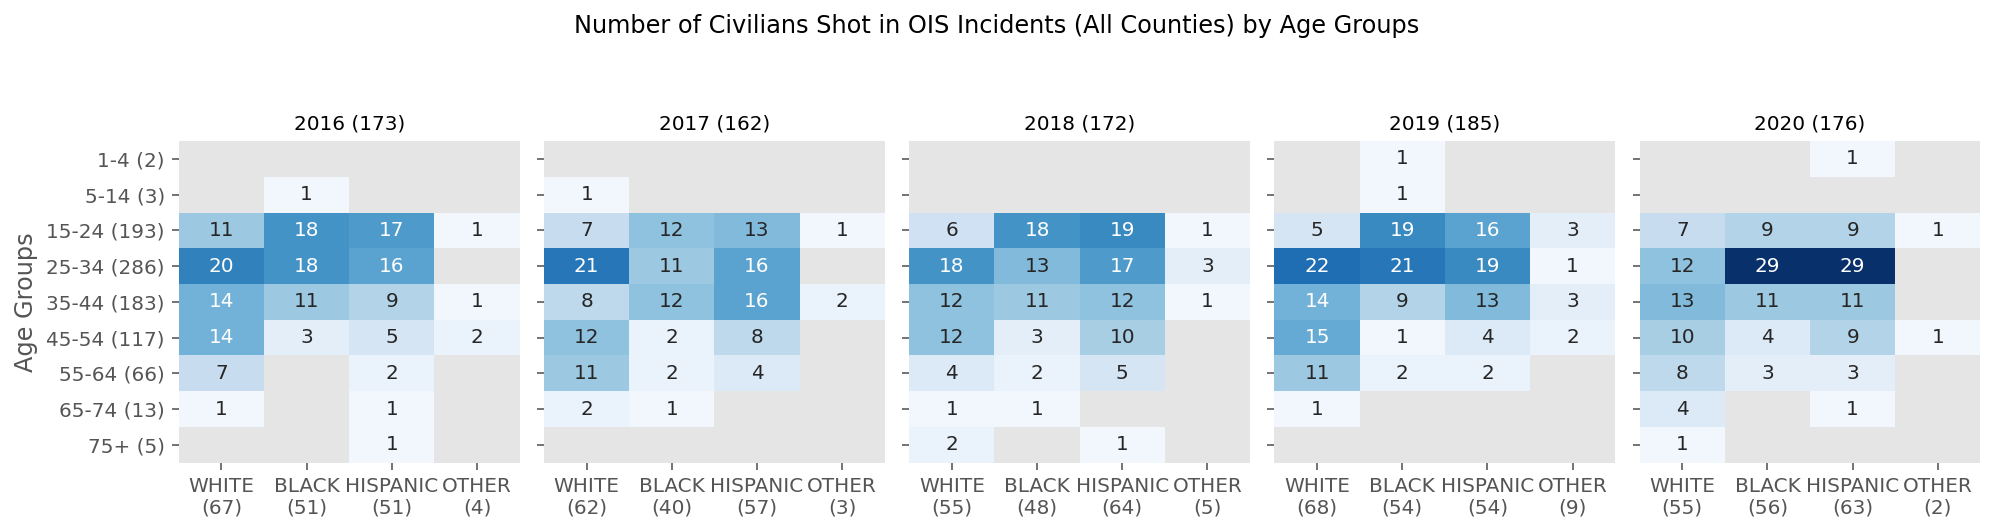

In [4]:

plot.plot_heatmap_age_race_year(
    df_civilian, 
    figsize=(14, 3.5), 
    cmap='Blues',
    title='Number of Civilians Shot in OIS Incidents (All Counties) by Age Groups'
)

This simple intersection of race and age already reveals something important that was hiddne in the OAG's reports; **almost every year, young children were shot by police.**

## Racial disparity in police shooting in Texas

In [5]:

df_census = pd.read_pickle('https://github.com/texas-justice-initiative/officer_involved_shooting/blob/master/Data/Interim/census_county_race_2010.pkl?raw=true')

# highlighting the top 5 counties in terms of the no. civilians shot
top5_locs = df_civilian['incident_county'].value_counts()[:5].index.values

temp = df_civilian.groupby(['incident_county'])['date_incident'].count().sort_values(ascending=False)
county_names_by_incidents = temp.index
pop_size = df_census.sum(axis=1).loc[county_names_by_incidents.values]

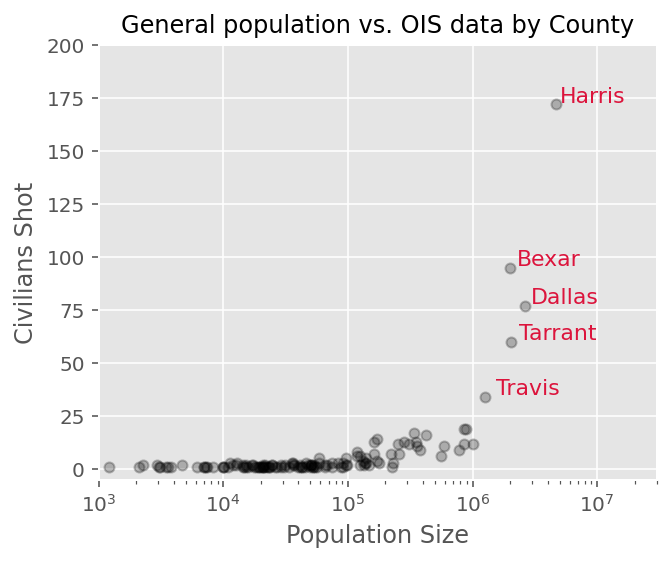

In [6]:

fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(pop_size, temp, 'o', color='k', markersize=5, alpha=0.25)
ax.set(xscale='log', xlabel='Population Size', ylabel='Civilians Shot', title='General population vs. OIS data by County', xlim=[1e3, 1e7*3], ylim=[-5, 200])
for county_name in top5_locs:
    ax.annotate(county_name.capitalize(), (pop_size.loc[county_name]+3e5, temp.loc[county_name]+1), fontsize=11, color='crimson')

When I broke down the OIS data at the county level, I found that the number of civilians shot by police is positively correlated with the population size. Interestingly, most counties have a very small number of incidents and more than half of the data come from the top 5 most populous counties (annotated in the figure); **Harris, Bexas, Dallas, Tarrant, and Travis.**

The race composition of all the civilians shot by police in our data shows that the proportion of each race group, white, Black and Hispanic is comparable.

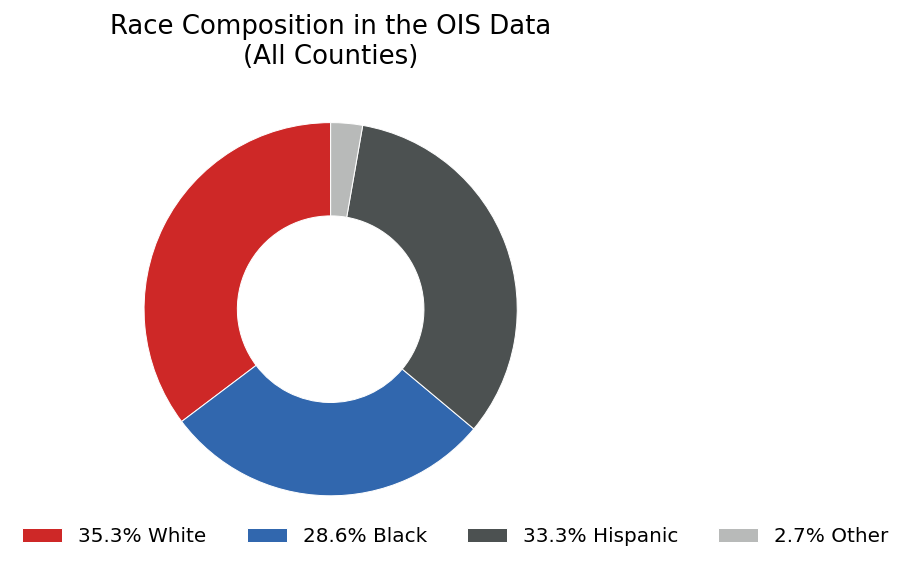

In [20]:

plot.plot_pie(df_civilian, 'civilian_race', colors=cols_race, remove_labels=True, 
              title='Race Composition in the OIS Data\n(All Counties)',
              figsize=(4, 4), 
              fontsize=13,              
              bbox_to_anchor=(1.5, 0.1))

However, if we focus on the top 5 counties, it is now clear that **Black people are shot more often (39.3%) than white (25.1%) and Hispanic (32.2%).** 

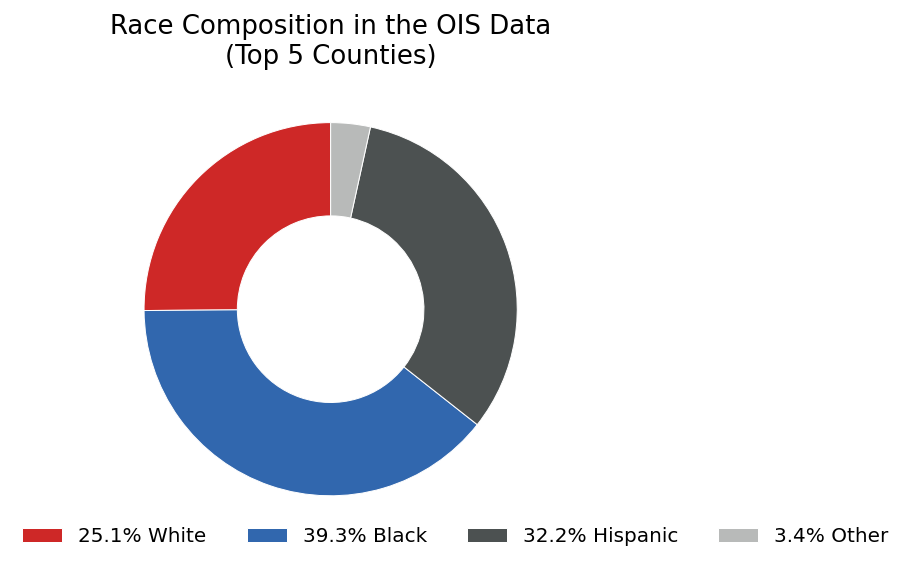

In [8]:

df_civilian_top5 = df_civilian.loc[df_civilian['incident_county'].isin(top5_locs), :]
plot.plot_pie(df_civilian_top5, 'civilian_race', colors=cols_race, remove_labels=True, 
              title='Race Composition in the OIS Data\n(Top 5 Counties)',
              figsize=(4, 4),
              fontsize=13,
              bbox_to_anchor=(1.5, 0.1))

### Black people are overrepresented in police shooting incidents

At this point, one might think that this is simply because the top 5 counties have larger Black populations than other counties. It's true that in Texas, these top 5 counties with metropolitan areas have more Black people. If this hypothesis is true, this disproportionate distribution across race groups *should be reflected in the census data*.

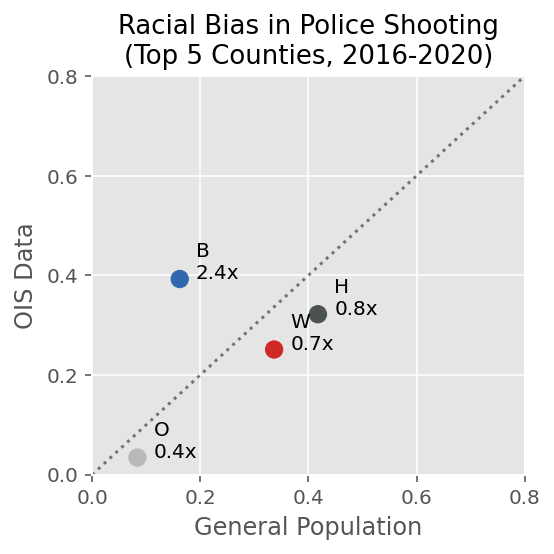

In [9]:

plot.plot_scatter_compare_race_incident_vs_population_pulled(
    df_civilian, 
    df_census,
    n_county=5,
    annotate=True,
    xylim=0.8,
    figsize=(4, 4),
    title='Racial Bias in Police Shooting\n(Top 5 Counties, 2016-2020)')

Unfortunately, I found that that was not the case. The plot above shows race representation of general population (US census, x axis) and of the police shooting incidents (OIS data, y axis). The dotted diagonal line shows equal representation between the census and the police shooting data. **Any data points above the line indicate overrepresentation in the OIS data compared with the general population data** (census).

The four colored dots represent the race groups in our data; Black (B), Hispanic (H), white (w), and others (O). The annotated numbers next to the dots show the rate of overrepresentation in the police shooting data of a race group compared to the census data. This analysis shows that **Black people are 2.4 times overrepresented in police shooting compared with general population** in these top 5 counties. The figure below shows that this pattern is in fact consistent across all 5 counties although **the rate of overrepresentation for Black people is much higher particuarly for Harris and Dallas counties**.

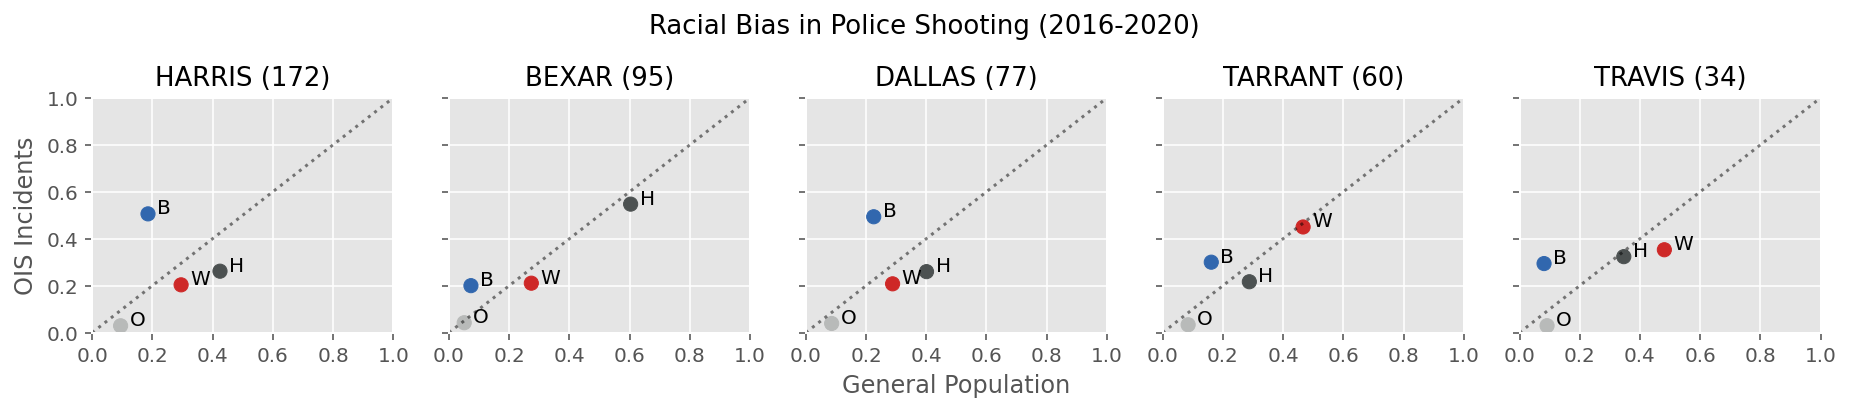

In [18]:

plot.plot_scatter_compare_race_incident_vs_population(
    df_civilian, 
    df_census, 
    fontsize=13,
    title='Racial Bias in Police Shooting (2016-2020)')

### Black and Hispanic people are overrepresented in *fatal* police shooting incidents

Since the OIS data has a column that shows severity of incidents in terms of whether victims were killed or just injured, I decided to use the morality data of general population published by Texas Department of State Health Services (DSHS) to examine the **racial bias in fatal police shooting incidents**.

In [11]:

df_civilian_died = df_civilian[df_civilian['died']==1]
df_death_county = pd.read_csv('https://raw.githubusercontent.com/texas-justice-initiative/officer_involved_shooting/master/Data/Raw/Census/mortality_rate_by_county.csv', index_col='County')
df_death_county = df_death_county.drop('TOTAL', axis=1)

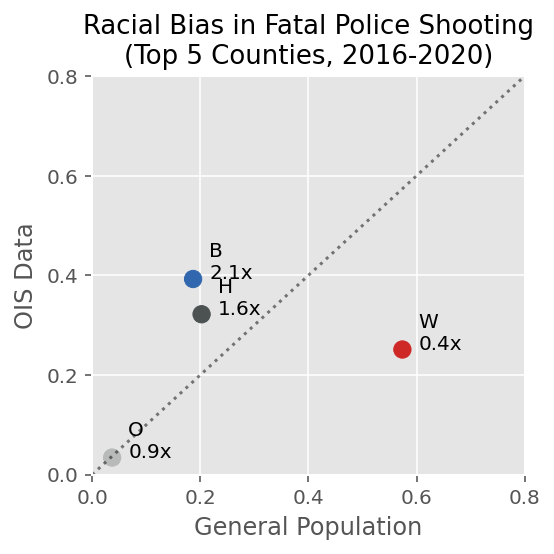

In [12]:

plot.plot_scatter_compare_race_incident_vs_population_pulled(
    df_civilian, 
    df_death_county,
    n_county=5,
    annotate=True,
    xylim=0.8,
    figsize=(4, 4),
    title='Racial Bias in Fatal Police Shooting\n(Top 5 Counties, 2016-2020)')

Similar to the comparison with the census data, I found the **overrepresentation of Black people in the fatal police shooting incidents (2.1 times overrepresented)**. In addition, **Hispanic people were overrepresented as well (1.6 times)**. This pattern of overrepresentation of Black and Hispanic people was consistent across all 5 counties:

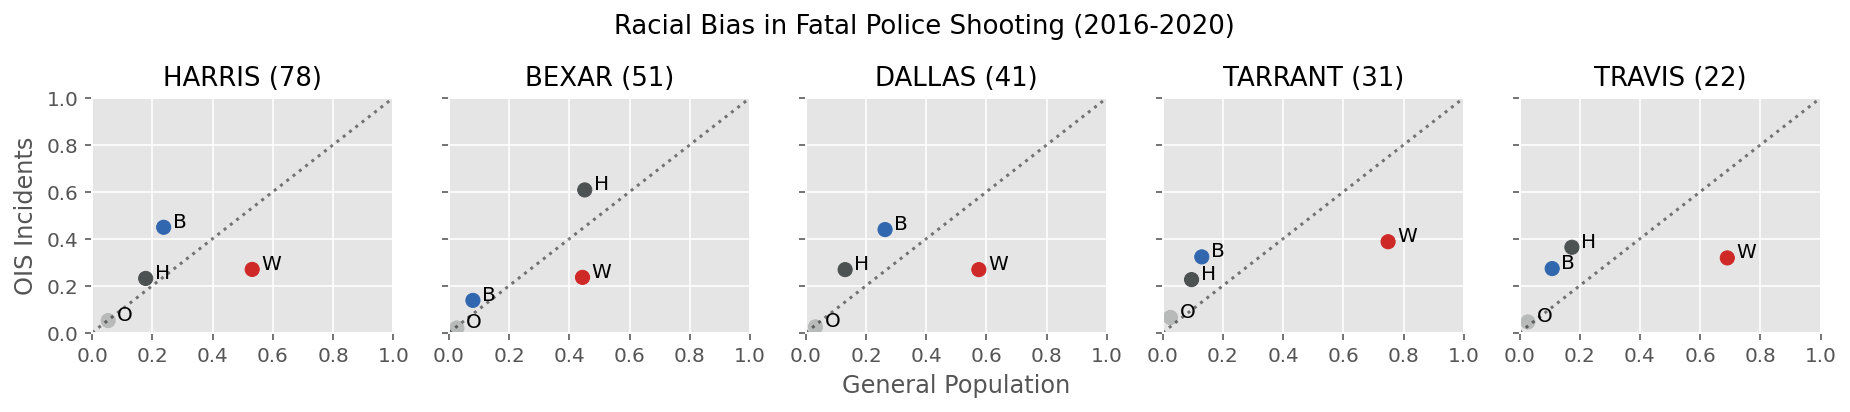

In [19]:

plot.plot_scatter_compare_race_incident_vs_population(
    df_civilian_died, 
    df_death_county, 
    fontsize=13,
    title='Racial Bias in Fatal Police Shooting (2016-2020)')

### Young Black men are overrepresented in fatal police shooting incidents

I found a similar result when I looked at the intersection of race and age demographics. In the figure below, I've compared the race composition of mortality data (left, "County Deaths") and the OIS data (right, "Deaths by OIS") in various age groups (5 subplots). I used the same color palette as above (red for white, blue for Black, and dark gray for Hispanic). If there is no disproportionate race representation in the fatal police shooting data per age group, the two stacked bars (general population's mortality and fata police shooting) in a subplot should look similar.

However, it is clear that Black people are overrepresented especially in younger age groups (ages 15-24 particularly). **In the ages 15-24, Black people were about 3 times overrepresented in fatal police shooting incidents.** This pattern quickly disappears as we move towards older age groups (plots on the right side). 

In [14]:

race_list = ['WHITE', 'BLACK', 'HISPANIC', 'OTHER']

# mortality data by age and gender (male only)
df_death_age_male = pd.read_csv(
    'https://raw.githubusercontent.com/texas-justice-initiative/officer_involved_shooting/master/Data/Raw/Census/mortality_rate_by_age_male.csv', 
    index_col='Age').iloc[1:, :]
age_range_names = df_death_age_male.index.values

# intersection of race and gender
df_civilian_died_male_age = df_civilian_died.loc[df_civilian_died['civilian_gender']=='MALE'].groupby(['civilian_age_binned', 'civilian_race'])['date_incident'].count().unstack().fillna(0)[race_list]

# selecting the age groups of interest
inds_age_binned = np.arange(2, 7)
df_civilian_died_male_age = df_civilian_died_male_age.loc[inds_age_binned, :].drop('OTHER', axis=1)
df_death_age_male = df_death_age_male.iloc[inds_age_binned, :].drop('TOTAL', axis=1)

# convert counts to proportions
df_civilian_died_male_age_pct = preprocess.pct(df_civilian_died_male_age, 1)
df_death_age_male_pct = preprocess.pct(df_death_age_male, 1)

# changing the index for plotting
df_civilian_died_male_age_pct.index = ['Age {}'.format(s) for s in age_range_names[inds_age_binned]]
df_death_age_male_pct.index = ['Age {}'.format(s) for s in age_range_names[inds_age_binned]]

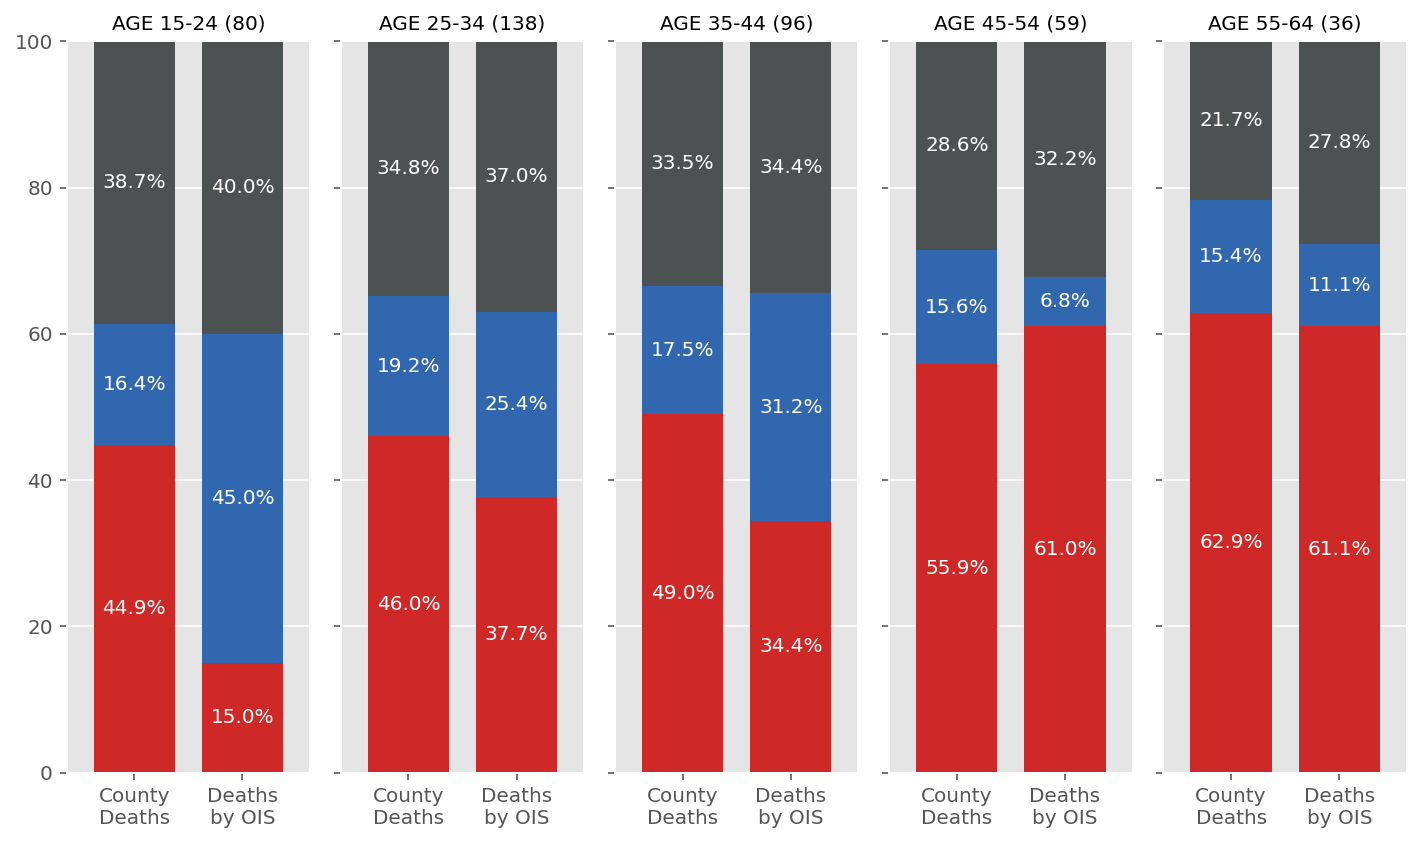

In [15]:

plot.plot_stackedbar_compare_ratio(
    df_civilian_died_male_age_pct,
    df_death_age_male_pct,
    df_civilian_died_male_age.sum(axis=1).astype(int), 
    severity='Deaths', 
    legend=False,
    figsize=(10, 6)
)

### Incident cause for Black people is often "Other" 

I found another example of racial disparity in how law enforcement agencies labeled the cause of incidents. The OIS report provides a list of five categories as a potential cause of an incident; "Traffic Stop", "Emergency/Request for Assistance", "Execution of a Warrant", "Hostage/Barricade/Other Emergency", and "Other". Obviously, the last category, **"Other" has the lowest accountability and transparency** because it can be anything. 

In [16]:

incident_causes_list = ["Traffic Stop", "Emergency/Request for Assistance", "Execution of a Warrant", "Hostage/Barricade/Other Emergency", "Other"]
incident_causes_list_sorted = df_civilian[incident_causes_list].sum(axis=0).sort_values(ascending=False).index
df_civilian_top5 = df_civilian.loc[df_civilian['incident_county'].isin(top5_locs), :]
df_civilian_incident_race_top5 = df_civilian_top5.groupby('civilian_race')[incident_causes_list_sorted].sum().loc[race_list, incident_causes_list_sorted]
df_civilian_incident_race_top5_pct = preprocess.pct(df_civilian_incident_race_top5, 0)

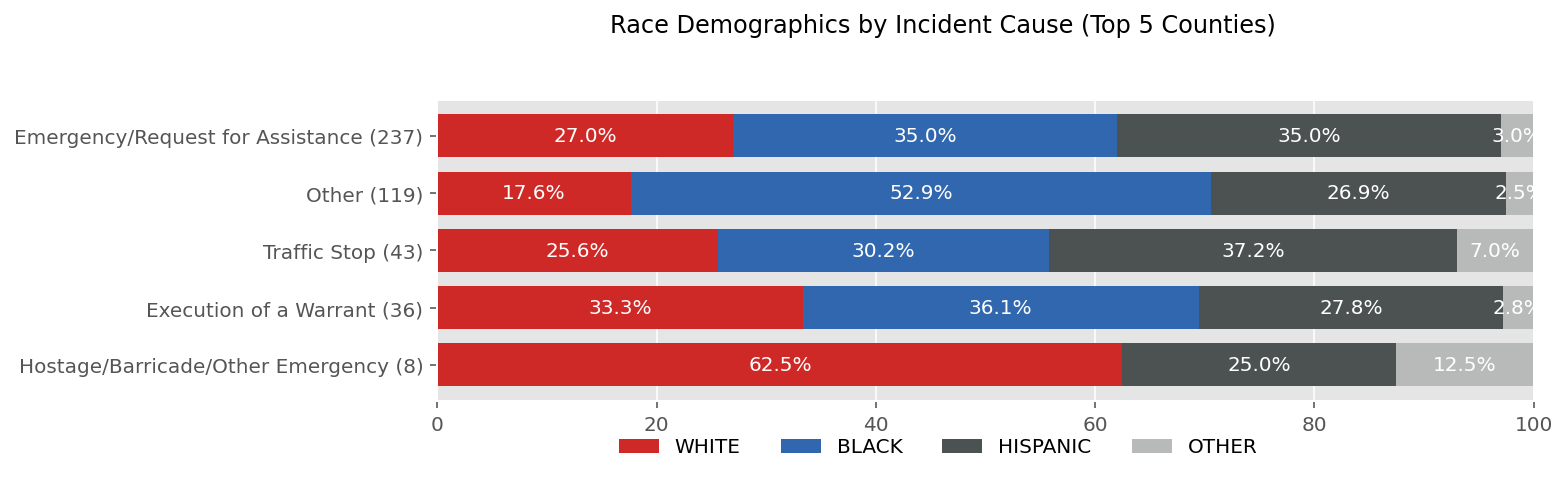

In [17]:

fig, ax = plt.subplots(1, 1, figsize=(11, 3))
df_civilian_incident_race_top5_pct.T[::-1].plot(kind='barh', stacked=True, ax=ax, legend=False, width=0.75, color=cols_race)
plot.annotate(ax, 'h', 'percent', fontsize=10)
ax.set(xlim=[0, 100])
ax.set_yticklabels([s + ' ({})'.format(n) for s, n in zip(df_civilian_incident_race_top5.columns, 
                                                          df_civilian_incident_race_top5.sum(axis=0).values)][::-1], fontsize=10)
fig.legend(race_list, ncol=4, bbox_to_anchor=(0.81, 0.09), fontsize=10)

fig.suptitle('Race Demographics by Incident Cause (Top 5 Counties)', fontsize=12, x=0.6, y=1.03)
fig.tight_layout()

When incident cause data is broken down by race groups, the "Other" category shows unusually high proportion of Black people. This means that **when OIS reports were filed, more than half of the times, the incident cause was identified as "Other" when the victim was a Black person.** Again, considering this category's low accountability and transparency, this racial disparity was another concerning example.

## Conclusions

In this post, I've introduced several examples of my data science volunteering work at Texas Justice Initiative and a larger context surrounding it. Using reference data and conducting intersectional analyses, I was able to identify important racial disparity in Texas police shooting data that was never addressed in the state government's official annual reports. In the follow-up post, I will share some useful tips for tech volunteering (especially in terms of using data science skills).